# Pymaceuticals Inc.
---

### Analysis

1. The pie chart shows that the study used almost equal numbers of male and female mice. However, it doesn't show the distribution of males and females across the 10 drug regimens. Knowing this distribution would give a better understanding of the dataset for each drug regimen. 

2. The line plot of tumor volume vs. time point for a single mouse treated with Capomulin shows the tumor volume over 45 days. Creating similar line charts for other drug regimens would help compare them, but this could be misleading since it would represent only 10 mice out of a total of 247.

A better approach would be to group the mice by their drug regimens, calculate the average tumor volume at each time point (0, 5, 10, 15, 20, 25, 30, 35, 40, 45) for each group, and then plot these averages on a single graph. The x-axis would show the time points, and the y-axis would show the tumor volume, with different colors representing the 10 drug regimens. This would provide a clearer trend of tumor volume changes over 45 days for each drug regimen..

3. The box plot shows the distribution of tumor volumes for each treatment group. Capomulin and Ramicane have lower final tumor volumes, with upper bounds of 51.8 and 54.3, respectively, compared to 82.7 and 87.6 for Infubinol and Ceftamin. Capomulin has an interquartile range (IQR) of 7.7, while Ceftamin has the highest IQR of 15.5, indicating greater variability in tumor volumes. This suggests that Ceftamin is less reliable and effective than Capomulin, as its results are more inconsistent. 



 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df= pd.merge(study_results,mouse_metadata,how="inner",on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [39]:
# Checking the number of mice.
count_mice= mouse_metadata["Mouse ID"].count()
count_mice




249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


dup_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

dup_mice





array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID.



In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df[merge_df['Mouse ID'].isin(dup_mice)==False]
cleaned_df.head()






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice in the clean DataFrame.
number_mice=cleaned_df["Mouse ID"].nunique()
number_mice

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

Summary_statistics_df= pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                                      "Tumor Volume Variance" :	variance, "Tumor Volume Std. Dev.": std,
                                      "Tumor Volume Std. Err." : sem})
Summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

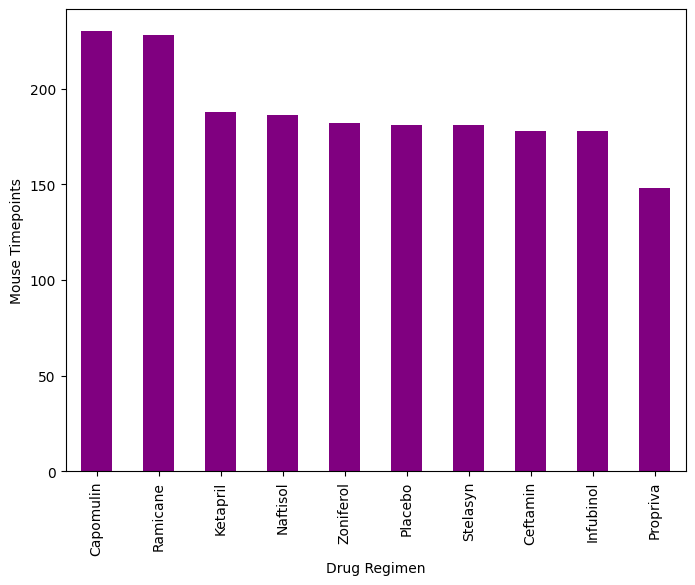

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_time= cleaned_df.groupby(["Drug Regimen"])["Timepoint"].count() 
count_per_time=count_per_time.sort_values(ascending=False)
pandas= count_per_time.plot(kind="bar", figsize=(8,6),xlabel="Drug Regimen", ylabel="Mouse Timepoints", color="purple")
plt.show()


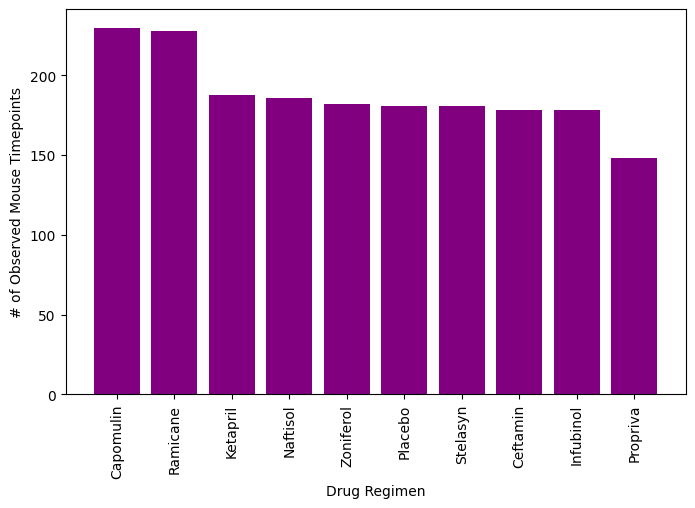

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,5)) 
plt.bar(count_per_time.index, count_per_time.values, color="purple", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

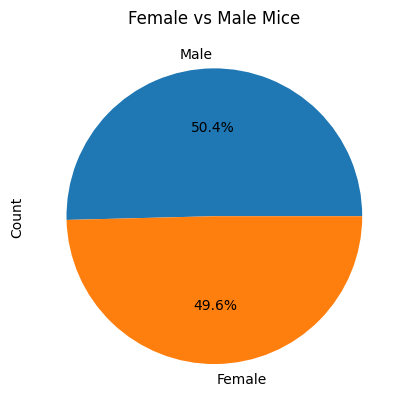

In [48]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
group_by_sex=cleaned_df.groupby(["Sex"])["Mouse ID"].nunique()
# Get the unique mice with their gender
group_by_sex

# Make the pie chart
group_by_sex = group_by_sex.reindex(["Male", "Female"])
plt.title("Female vs Male Mice")
group_by_sex.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Count")

# group_by_sex(kind="pie",autopct= "%1.1f%%",ylabel="Count")
plt.show()

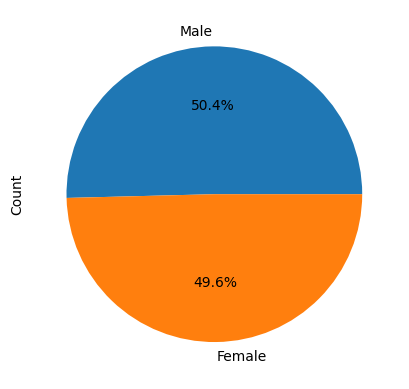

In [49]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels=["Male","Female"]
Sizes= [125,123]
plt.pie(Sizes, labels=labels,
        autopct="%1.1f%%", shadow=False, )
plt.ylabel("Count")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin


selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_df[cleaned_df['Drug Regimen'].isin(selected_regimens)]


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_per_mouse = filtered_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].last()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(cleaned_df,final_tumor_volume_per_mouse, on=["Mouse ID","Tumor Volume (mm3)"],how="inner")
merge_df.set_index("Mouse ID")

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
u153,0,45.000000,0,Ceftamin,Female,11,25
b447,0,45.000000,0,Ceftamin,Male,2,30
x226,0,45.000000,0,Ceftamin,Male,23,28
t573,0,45.000000,0,Ceftamin,Female,15,27
c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...
a644,45,32.978522,1,Ramicane,Female,7,17
i177,45,33.562402,3,Ramicane,Male,10,18
r944,45,41.581521,2,Capomulin,Male,12,25


In [51]:
# # # # Put treatments into a list for for loop (and later for plot labels)
# # # # # Create empty list to fill with tumor vol data (for plotting)
# # # # # Calculate the IQR and quantitatively determine if there are any potential outliers.
# # # # # Locate the rows which contain mice on each drug and get the tumor volumes
# # # # # add subset
# # # # # Determine outliers using upper and lower bounds

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


plotting_df = []


for drug in selected_regimens:
    drug_df = merge_df.loc[merge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    quartiles = drug_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)  
    

    outliers = drug_df[(drug_df < lower_bound) | (drug_df > upper_bound)]
    
    print(f"--------------------------------------")
    print(f"Results for {drug}:")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers}")
    

    plotting_df.append(drug_df.values) 





--------------------------------------
Results for Capomulin:
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------
Results for Ramicane:
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------
Results for Infubinol:
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------------
Results for Ceftamin:
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


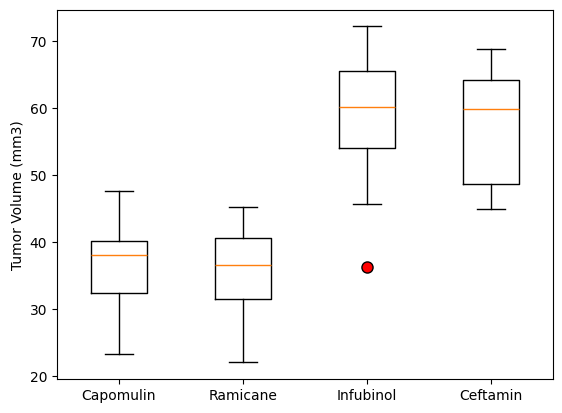

In [52]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(plotting_df, labels=selected_regimens, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

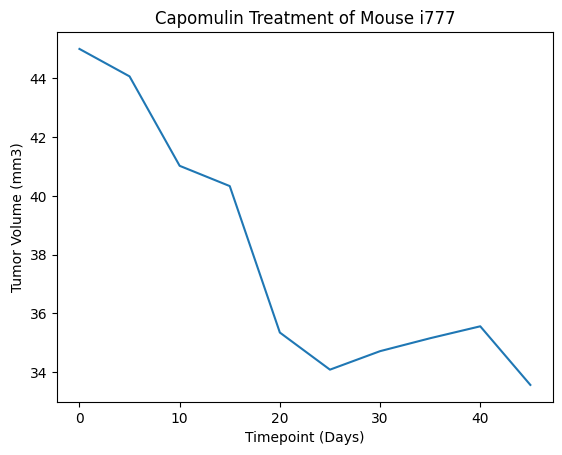

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse= cleaned_df.loc[cleaned_df["Mouse ID"]=="i177", :]

plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse i777")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

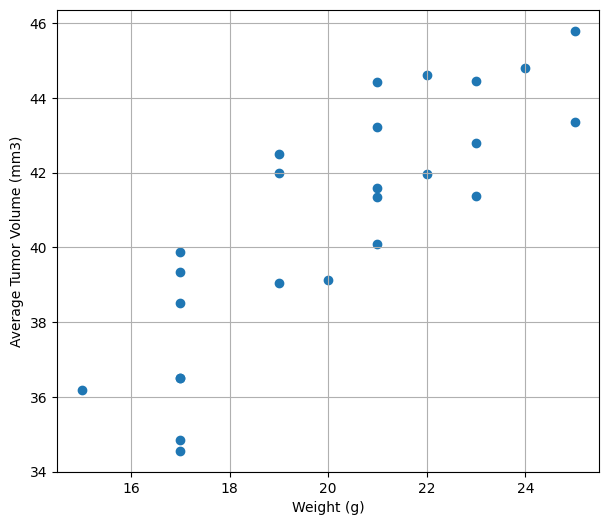

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']



avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(7, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid()
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume intensity is 0.84


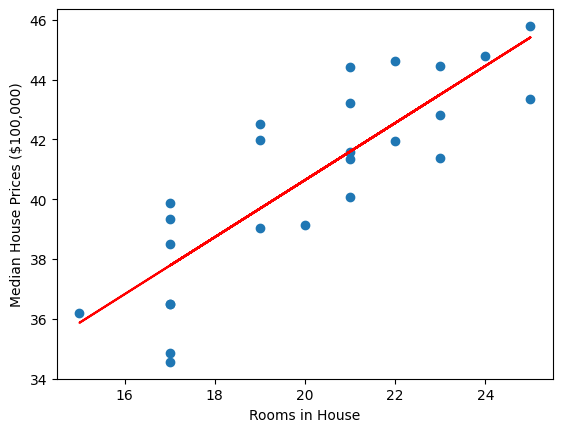

In [55]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

print(f"The correlation coefficient between mouse weight and average observed tumor volume intensity is {round(st.pearsonr(mouse_weight, avg_tumor_volume )[0],2)}")

x_values = mouse_weight
y_values = avg_tumor_volume 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()
